In [1]:
import numpy as np
import cv2 
import matplotlib
import pywt
from matplotlib import pyplot as plt

In [2]:
# If we need to check shape of the image
img = cv2.imread('Dataset/Lionel_Messi/6180f2c0-b3e8-11ef-9e95-3339f02d261e.jpg', cv2.IMREAD_UNCHANGED)
img.shape

(326, 580, 3)

In [3]:
# When need to open the image from a window
cv2.imshow('Original Image', img)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()

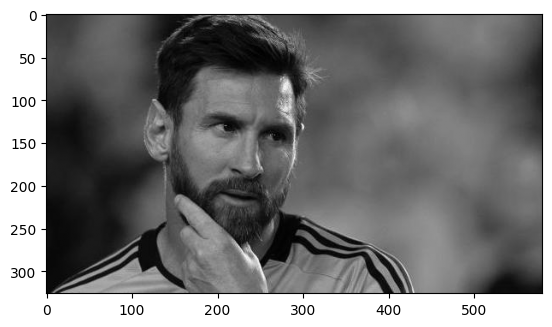

In [4]:
#if need to change image color into gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape
plt.imshow(gray_img, cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

# **** To detect face from one image ****
faces = face_cascade.detectMultiScale(
    img, scaleFactor=1.05, minNeighbors=2, minSize=(100, 100)
)
# faces

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(147, 70, 177, 177)

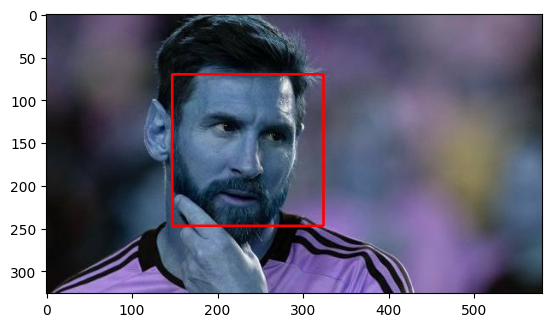

In [7]:
# **** To draw a rectangle around the face ****
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

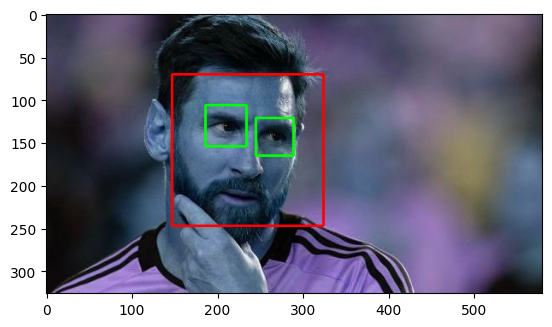

In [8]:
# **** To draw rectangles around the face and eyes ****
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_img = img[y:y+h, x:x+w]     # roi = region of interest
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_img)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show

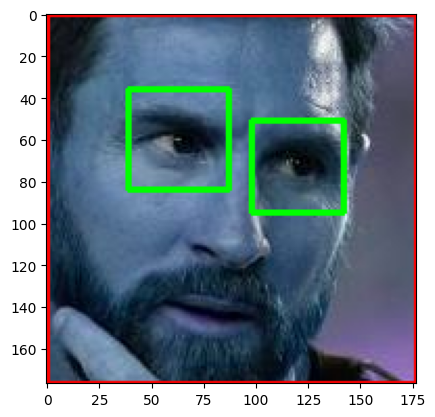

In [9]:
# **** to get only the crop image ****
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [10]:
# cropped_img = get_cropped_image('./Dataset/Lionel Messi/images.jpeg')
# plt.imshow(cropped_img)
cropped_img = np.array(roi_color)
cropped_img.shape

(177, 177, 3)

In [11]:
# A function for get cropped image from face identified images
def get_cropped_image(img_path):
    img = cv2.imread(img_path)
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.05, minNeighbors=2, minSize=(100, 100))
    for (x,y,w,h) in faces:
    # face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_img = img[y:y+h, x:x+w]     # roi = region of interest
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_img)
        if len(eyes)>=2:
            return roi_color
        # cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [24]:
path_to_data = "./Dataset/"
path_to_cropped_data = "./Dataset/cropped/"

In [29]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
print(img_dirs)

['./Dataset/Due_Lipa', './Dataset/Lionel_Messi', './Dataset/Ronaldo', './Dataset/Selena_Gomez']


In [31]:
if not os.path.exists(path_to_cropped_data):
    os.makedirs(path_to_cropped_data)

In [32]:
cropped_img_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] #celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)
    
    celebrity_file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("generating folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count +=1

Due_Lipa
generating folder:  ./Dataset/cropped/Due_Lipa
Lionel_Messi
generating folder:  ./Dataset/cropped/Lionel_Messi
Ronaldo
generating folder:  ./Dataset/cropped/Ronaldo
Selena_Gomez
generating folder:  ./Dataset/cropped/Selena_Gomez


In [33]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

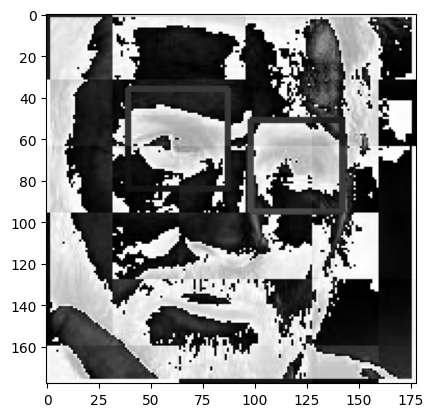

In [34]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [35]:
celebrity_file_name_dict

{'Due_Lipa': ['./Dataset/cropped/Due_Lipa/Due_Lipa1.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa2.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa3.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa4.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa5.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa6.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa7.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa8.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa9.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa10.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa11.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa12.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa13.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa14.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa15.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa16.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa17.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa18.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa19.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa20.png',
  './Dataset/cropped/Due_Lipa/Due_Lipa21.png',
  './Datas

In [36]:
celebrit_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    celebrit_dict[celebrity_name] = count
    count +=1
celebrit_dict

{'Due_Lipa': 0, 'Lionel_Messi': 1, 'Ronaldo': 2, 'Selena_Gomez': 3}

In [37]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None: 
            continue
        scalled_raw_image = cv2.resize(img,(32,32)) #all the image should be in same scale for the training
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrit_dict[celebrity_name])

In [38]:
len(X[0])

4096

In [39]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(78, 4096)

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.65

In [42]:
len(X_test)

20

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       1.00      0.60      0.75         5
           2       0.71      0.83      0.77         6
           3       0.75      0.50      0.60         6

    accuracy                           0.65        20
   macro avg       0.70      0.65      0.64        20
weighted avg       0.74      0.65      0.66        20


Use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Kristila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Kristila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Kristila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Kristila\AppData\Local\Progr

,model,best_score,best_params
0,svm,0.540909,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.469697,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.519697,{'logisticregression__C': 1}


In [47]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test,y_test)

0.65

In [49]:
best_estimators['random_forest'].score(X_test,y_test)

0.55

In [50]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 0, 1, 0],
       [1, 3, 1, 0],
       [0, 0, 5, 1],
       [3, 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

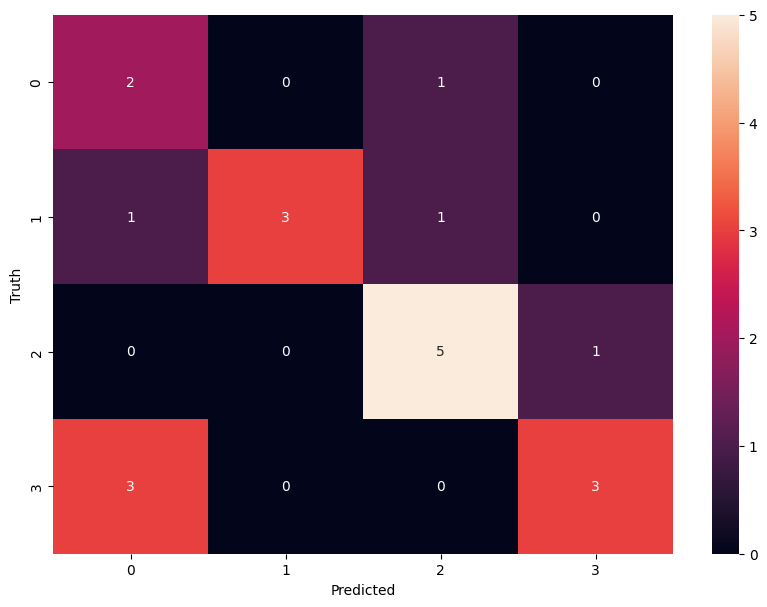

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
celebrit_dict

{'Due_Lipa': 0, 'Lionel_Messi': 1, 'Ronaldo': 2, 'Selena_Gomez': 3}

Save the trained model


In [56]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

Save class dictionary


In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(celebrit_dict))